## Observations and Insights 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ids = study_data_complete.loc[study_data_complete.duplicated(subset =["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_ids


array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_ids
#duplicate_mouse_ids["Mouse"] = "g989"
#duplicate_mouse_ids

# set the index to the mouse ID

# check the mouse data for ID


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_ids)==False]


In [30]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())


248

In [36]:
mean = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean
variance = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance
std = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_error = clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_statistics = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": std,
    "Standard Error": standard_error
})
summary_statistics
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen


# variable to hold median Tumor Volume Data Grouped by Drug Regimen


# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen


# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen


# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen


# Convert to DataFrame

# Preview DataFrame


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = clean_data.groupby("Drug Regimen").agg({
    
    "Tumor Volume (mm3)": ["mean", "median",  "std", "var", "sem"]
})

    
summary_stats
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

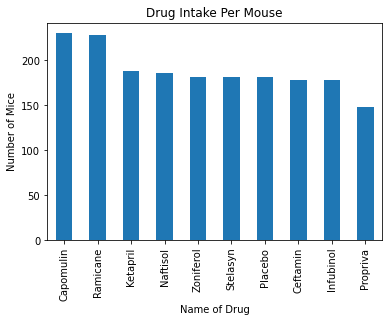

In [104]:
counts = clean_data["Drug Regimen"].value_counts()

counts.plot(kind="bar")
plt.xlabel("Name of Drug")
plt.ylabel("Number of Mice")
plt.title("Drug Intake Per Mouse")
plt.show()

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



# list of unique drug regimens

# drug regimen as x-axis values for plotting

# drop all duplicate mice


# get mice counts per drug


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


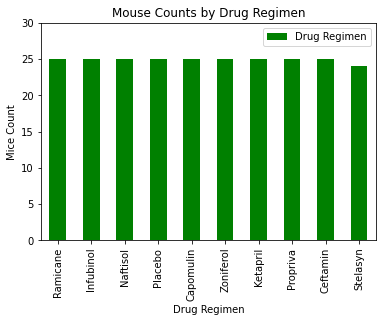

In [10]:
# plot the mouse counts for each drug using pandas


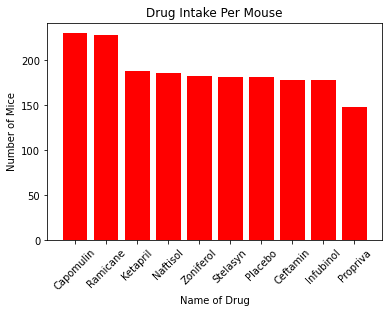

In [108]:
plt.bar(counts.index.values, counts.values, color="r", align="center")
plt.xlabel("Name of Drug")
plt.xticks(rotation = 45)
plt.ylabel("Number of Mice")
plt.title("Drug Intake Per Mouse")
plt.show()

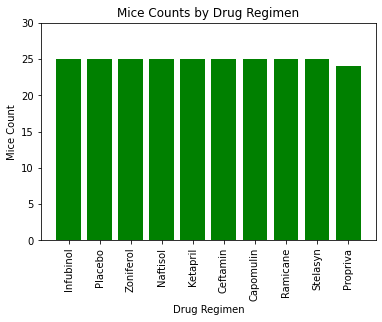

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen


<function matplotlib.pyplot.show(close=None, block=None)>

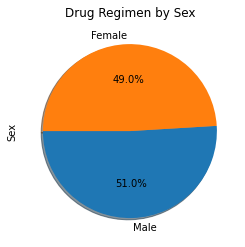

In [116]:
counts = clean_data["Sex"].value_counts()
counts.plot(kind="pie", autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Drug Regimen by Sex")
plt.show


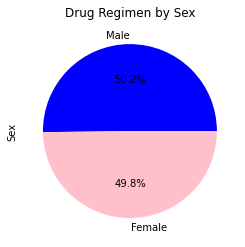

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


<function matplotlib.pyplot.show(close=None, block=None)>

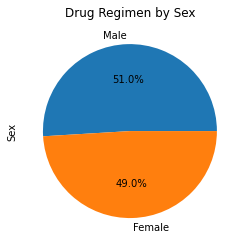

In [119]:
plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Drug Regimen by Sex")
plt.show

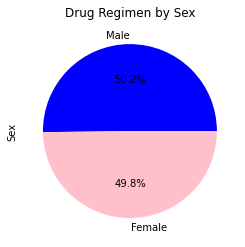

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [236]:
final_time = clean_data.groupby("Mouse ID")["Timepoint"].max()
final_time = final_time.reset_index()
final_time.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = final_time.merge(clean_data, on=["Mouse ID", "Timepoint"], how="left")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [189]:

print((merge_df["Drug Regimen"]).unique())

['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


In [248]:
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_list = []
for d in drug_list:
    final_tumor_list = merge_df.loc[merge_df["Drug Regimen"] == d, "Tumor Volume (mm3)"]
    tumor_list.append(final_time_list)
    
    quartiles = final_tumor_list.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_list.loc[(final_tumor_list < lower_bound) | (final_tumor_list > upper_bound)]
    print(f"{d}'s potential outliers: \n{outliers}\n")
print(upperq)
print(lowerq)
print(iqr)

Capomulin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

64.29983003
48.72207785
15.577752179999997


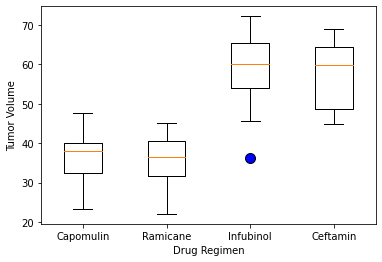

In [245]:
markers = dict(markerfacecolor="blue", markersize=10)
plt.boxplot(time_list, labels=drug_list,flierprops=markers)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin


# isolated view of just capomulin for later use


# Reset index so drug regimen column persists after inner merge


# get mouse count per drug


# Start by getting the last (greatest) timepoint for each mouse


Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
Name: Timepoint, dtype: int64

In [15]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# show all rows of data


,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
u153,Ceftamin,0,45.000000,0,Female,11,25
b447,Ceftamin,0,45.000000,0,Male,2,30
x226,Ceftamin,0,45.000000,0,Male,23,28
t573,Ceftamin,0,45.000000,0,Female,15,27
c326,Infubinol,5,36.321346,0,Female,18,25
w678,Ramicane,5,43.166373,0,Female,5,24
v339,Infubinol,5,46.250112,0,Male,20,26
m756,Infubinol,5,47.010364,1,Male,19,30
o813,Infubinol,5,45.699331,0,Male,24,28


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
 

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
u153,Ceftamin,45.000000
b447,Ceftamin,45.000000
x226,Ceftamin,45.000000
t573,Ceftamin,45.000000
c326,Infubinol,36.321346


In [17]:
# Determine outliers using upper and lower bounds


The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [18]:
# add subset 


# tumor volumes for each Drug Regimen


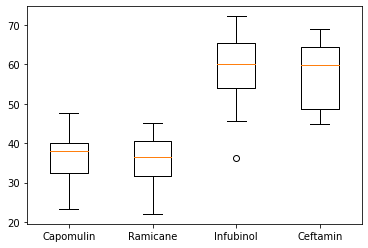

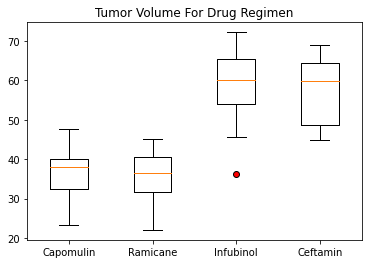

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest




In [252]:
cap_results = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
cap_results.head()
mouse_index = cap_results.loc[cap_results["Mouse ID"]=="s185"]
plt.plot(mouse_index["Time Point", cap_results["Tumor Volume (mm3)"]])
plt.show()

TypeError: '('Time Point', 0       45.000000
226     45.000000
227     45.000000
228     45.000000
229     45.000000
          ...    
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3), Length: 230, dtype: float64)' is an invalid key

## Line and Scatter Plots

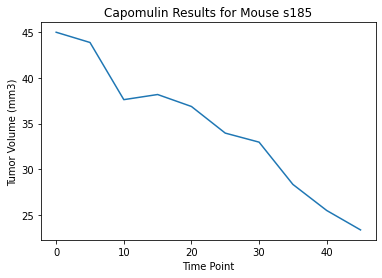

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#change index to mouse ID 

#remove other mouse IDs so only s185 shows


#set the x-axis equal to the Timepoint and y-axis to Tumor Volume


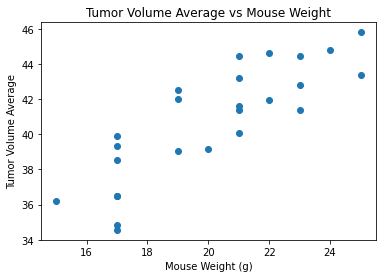

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume


# establish x-axis value for the weight of the mice


# produce scatter plot of the data


## Correlation and Regression

The correlation between both factors is 0.84


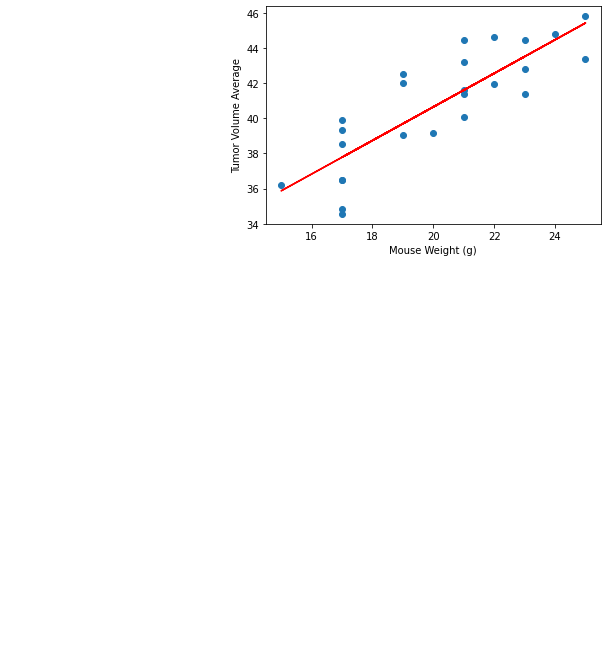

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg


#print St. Pearson Correlation Coefficient

# establish linear regression values

# linear regression line 


# scatter plot of the data
